In [167]:
# import statistical tools
import numpy as np
import pandas as pd
import sklearn
from statsmodels.formula.api import ols
import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from statsmodels.stats.outliers_influence import summary_table

In [168]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
# import dataset
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Boston.csv"
Boston = pd.read_csv(url, index_col = "SlNo")

In [170]:
# basic exploration of data
print(Boston.head())
print(Boston.corr())

         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
SlNo                                                                     
1     0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2     0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3     0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4     0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5     0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

      ptratio   black  lstat  medv  
SlNo                                
1        15.3  396.90   4.98  24.0  
2        17.8  396.90   9.14  21.6  
3        17.8  392.83   4.03  34.7  
4        18.7  394.63   2.94  33.4  
5        18.7  396.90   5.33  36.2  
             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0

In [171]:
# fit model through linear regression
Y = Boston['medv']
X = Boston['lstat']
model = ols("Y~X", data = Boston).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           5.08e-88
Time:                        18:32:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [172]:
# predict the model
dt = summary_table(model, alpha = 0.5)[1]
Y_prd = dt[:, 2]
Yprd_ci_lower, Yprd_ci_upper = dt[:, 6:8].T
print(pd.DataFrame(np.column_stack([Y_prd, Yprd_ci_lower, Yprd_ci_upper])).head())

           0          1          2
0  29.822595  25.618169  34.027022
1  25.870390  21.669748  30.071032
2  30.725142  26.519457  34.930827
3  31.760696  27.553387  35.968004
4  29.490078  25.286078  33.694078


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


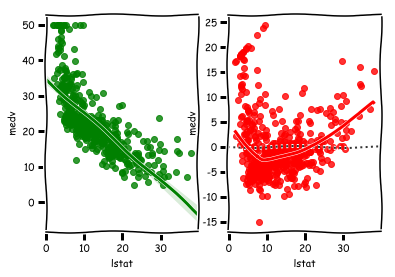

In [173]:
# plot graph with regression line
plt.figure(2).add_subplot(121)
print(sns.regplot(X, Y, data = model, color = 'g'))
plt.figure(2).add_subplot(122)
print(sns.residplot(X, Y, lowess = True, color = 'r'))